In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn as sk

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
df=pd.read_parquet("/content/drive/Shareddrives/CSI - Heart Project/data/consolidated-corrected.pq")

# **EDA**

In [4]:
df.shape

(2205, 95)

In [5]:
df.describe()

,camp_no,person_age,household_income,household_members,lifestyle_smoking_onset_age,lifestyle_smoking_quit_age,lifestyle_smoking_quantity,occupation_sitting,health_height,health_weight,...,health_BMI,report_total_cholesterol,report_triglycerides,report_HDL,report_LDL,report_VLDL,report_HBA1C,report_HBA1C_EAG,relative_age,relative_onset
count,2205.000000,2205.000000,2205.000000,2205.000000,499.000000,77.000000,490.000000,2203.000000,2205.000000,2205.000000,...,2205.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1788.000000,1786.000000,676.000000,677.000000
mean,11.657596,47.681633,20844.530612,4.334694,21.312625,43.415584,9.363265,4.986155,62.347392,63.105669,...,25.147909,183.138083,160.655738,43.257881,108.352081,31.955738,5.349681,105.289597,64.976331,53.735598
std,6.257935,12.586443,29985.064655,1.947472,6.485268,12.834319,7.670534,2.910474,4.437809,13.070456,...,4.489444,40.438252,90.058152,7.104871,40.976217,17.201298,2.539145,30.898234,12.327964,12.431092
min,1.000000,18.000000,1000.000000,1.000000,8.000000,16.000000,1.000000,0.000000,47.000000,27.000000,...,14.159198,90.000000,45.000000,15.000000,12.000000,5.200000,3.800000,62.360000,10.000000,1.000000
25%,6.000000,39.000000,6000.000000,3.000000,18.000000,34.000000,4.000000,2.000000,60.000000,54.000000,...,22.061568,156.000000,105.000000,38.000000,82.700000,21.000000,4.600000,85.320000,57.000000,47.000000
50%,12.000000,49.000000,10000.000000,4.000000,20.000000,45.000000,8.000000,4.000000,63.000000,63.000000,...,24.860820,180.000000,140.000000,42.000000,105.000000,28.000000,5.100000,99.670000,65.000000,55.000000
75%,17.000000,58.000000,24000.000000,5.000000,24.000000,52.000000,10.000000,8.000000,65.000000,71.000000,...,27.881713,205.000000,185.000000,48.000000,129.000000,37.000000,5.600000,114.020000,73.000000,60.000000
max,22.000000,83.000000,500000.000000,20.000000,60.000000,68.000000,60.000000,18.000000,85.000000,123.000000,...,43.311621,370.000000,950.000000,67.000000,884.000000,190.000000,102.540000,389.540000,98.000000,88.000000


In [6]:
df.head()

,sl_no,camp_no,camp_region,camp_district,camp_location,camp_urban,person_age,person_sex,person_pincode,person_language,...,report_HBA1C_status,report_HBA1C_EAG_status,relative_cad,relative_relation,relative_sex,relative_age,relative_disease,relative_onset,relative_hospitalization,relative_medication
0,1,1,Ganges Delta,North 24 Parganas,NEW BARRACKPUR,URBAN,50,FEMALE,700131,BENGALI,...,NORMAL,GOOD CONTROL,NO,None,None,NaN,None,NaN,NO,NO
1,2,1,Ganges Delta,North 24 Parganas,NEW BARRACKPUR,URBAN,43,MALE,700131,BENGALI,...,NORMAL,POOR CONTROL,NO,None,None,NaN,None,NaN,NO,NO
2,3,1,Ganges Delta,North 24 Parganas,NEW BARRACKPUR,URBAN,66,MALE,700130,BENGALI,...,PRE-DIABETIC,GOOD CONTROL,YES,FATHER,MALE,68.0,HEART DISEASE,55.0,YES,YES
3,4,1,Ganges Delta,North 24 Parganas,NEW BARRACKPUR,URBAN,66,FEMALE,700131,BENGALI,...,NORMAL,GOOD CONTROL,NO,None,None,NaN,None,NaN,None,None
4,5,1,Ganges Delta,North 24 Parganas,NEW BARRACKPUR,URBAN,64,MALE,700131,BENGALI,...,DIABETIC,POOR CONTROL,YES,WIFE,FEMALE,62.0,HEART DISEASE,40.0,NO,YES


In [38]:
new_df = df[['person_age', 'person_sex','person_appearance','lifestyle_smoking','lifestyle_alcohol',
             'health_BMI','household_income','person_education','relative_cad','relative_disease','relative_relation','health_bp_systolic',
             'health_bp_diastolic','report_HBA1C','household_water', 'household_oil', 'household_oil_MUSTARD',
             'household_oil_SUNFLOWER', 'household_oil_SOYBEAN', 'diet_vegetables',
              'diet_fish', 'diet_chicken', 'diet_meat', 'diet_eggs', 'diet_milk']].copy()

In [8]:
new_df.isnull().sum()

person_age                    0
person_sex                    0
person_appearance             0
lifestyle_smoking             0
lifestyle_alcohol             0
health_BMI                    0
household_income              0
person_education              2
relative_cad                 72
relative_disease           1528
relative_relation          1530
health_bp_systolic            0
health_bp_diastolic           0
report_HBA1C                417
household_water               0
household_oil                 0
household_oil_MUSTARD         0
household_oil_SUNFLOWER       0
household_oil_SOYBEAN         0
diet_vegetables               0
diet_fish                     0
diet_chicken                  0
diet_meat                     0
diet_eggs                     0
diet_milk                     0
dtype: int64

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  2.,  0.,  0.,  3.,  1.,  4.,  4.,  6.,
         4.,  8.,  8.,  0., 10., 15., 12., 16., 14., 24., 11., 21., 25.,
         0., 24., 32., 38., 31., 40., 45., 22.,  1.,  3.,  0.,  7.,  2.,
        11., 32., 41., 43., 42., 42., 41.,  0., 49., 52., 51., 60., 38.,
        43., 50., 32., 39.,  0., 46., 43., 45., 37., 35., 30., 43., 38.,
        29.,  0., 23., 27., 46., 29., 30., 37., 26., 34., 25.,  0., 22.,
        27., 28., 20., 24., 19., 20., 23., 18.,  0., 14.,  9., 16., 16.,
        18., 12., 13., 10., 12.,  0.,  5., 11., 11.,  9.,  9.,  7.,  4.,
         4.,  8.,  0.,  7.,  6.,  3.,  7.,  4.,  3.,  5.,  7.,  7.,  0.,
         2.,  5.,  1.,  4.,  0.,  0.,  0.,  2.,  1.,  0.,  4.,  3.,  4.,
         1.,  1.,  1.,  1.,  1.,  2.,  0.,  0.,  1.,  1.,  0.,  2.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.

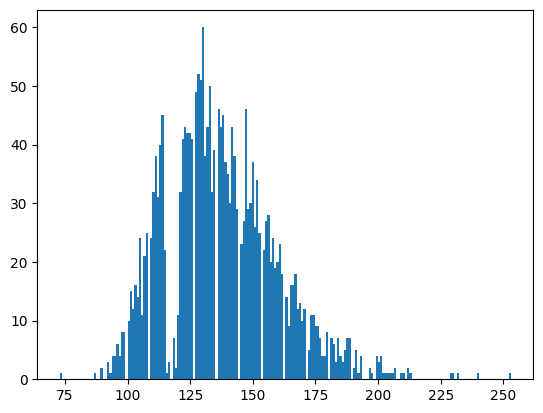

In [9]:
plt.hist(new_df.health_bp_systolic,bins=200)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  3.,  1.,
         0.,  4.,  0.,  4.,  0.,  6.,  4.,  0.,  8.,  0.,  8., 10.,  0.,
        15., 12.,  0., 16., 14.,  0., 24.,  0., 11., 21.,  0., 25., 24.,
        32.,  0., 38., 31.,  0., 40., 45.,  0., 22.,  1.,  3.,  0.,  7.,
         2., 11.,  0., 32., 41., 43.,  0., 42., 42., 41.,  0., 49., 52.,
        51., 60.,  0., 38., 43., 50., 32., 39.,  0., 46., 43., 45., 37.,
        35., 30.,  0., 43., 38., 29., 23., 27., 46., 29., 30., 37., 26.,
         0., 34., 25., 22., 27., 28., 20., 24., 19., 20., 23., 18., 14.,
         9., 16., 16., 18., 12., 13., 22.,  5., 11., 11.,  9.,  9.,  7.,
         4.,  4.,  8., 13.,  3.,  7.,  4.,  3.,  5.,  7.,  9.,  5.,  1.,
         4.,  0.,  0.,  2.,  1.,  4.,  7.,  1.,  1.,  1.,  2.,  2.,  0.,
         1.,  1.,  2.,  1.,  0.,  0.,  0.,  0.,  0.

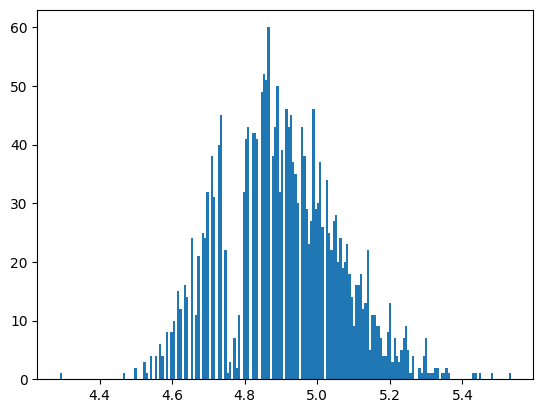

In [10]:
plt.hist(new_df.health_bp_systolic.map(np.log),bins=200)

In [39]:
new_df['health_bp_systolic']=new_df.health_bp_systolic.map(np.log)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  3.,  1.,
         0.,  4.,  0.,  4.,  0.,  6.,  4.,  0.,  8.,  0.,  8., 10.,  0.,
        15., 12.,  0., 16., 14.,  0., 24.,  0., 11., 21.,  0., 25., 24.,
        32.,  0., 38., 31.,  0., 40., 45.,  0., 22.,  1.,  3.,  0.,  7.,
         2., 11.,  0., 32., 41., 43.,  0., 42., 42., 41.,  0., 49., 52.,
        51., 60.,  0., 38., 43., 50., 32., 39.,  0., 46., 43., 45., 37.,
        35., 30.,  0., 43., 38., 29., 23., 27., 46., 29., 30., 37., 26.,
         0., 34., 25., 22., 27., 28., 20., 24., 19., 20., 23., 18., 14.,
         9., 16., 16., 18., 12., 13., 22.,  5., 11., 11.,  9.,  9.,  7.,
         4.,  4.,  8., 13.,  3.,  7.,  4.,  3.,  5.,  7.,  9.,  5.,  1.,
         4.,  0.,  0.,  2.,  1.,  4.,  7.,  1.,  1.,  1.,  2.,  2.,  0.,
         1.,  1.,  2.,  1.,  0.,  0.,  0.,  0.,  0.

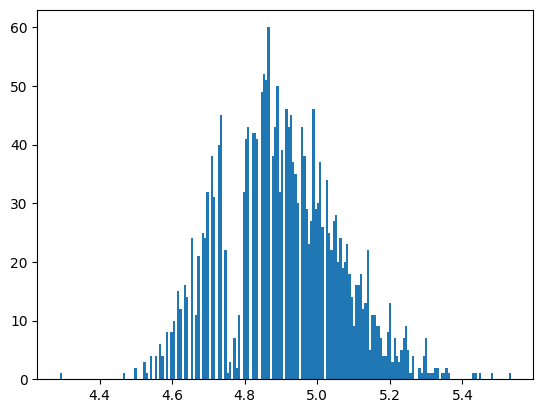

In [12]:
plt.hist(new_df.health_bp_systolic,bins=200)

In [40]:
new_df=new_df.loc[(new_df['person_age']>20) & (new_df['person_age']<70)]

<Axes: >

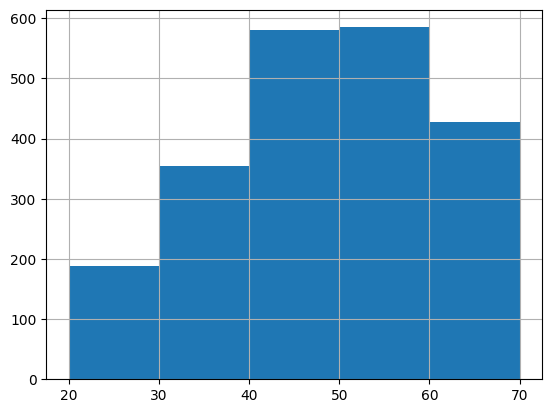

In [14]:
x=new_df.person_age
x.hist(bins=range(20,80,10))

<Axes: >

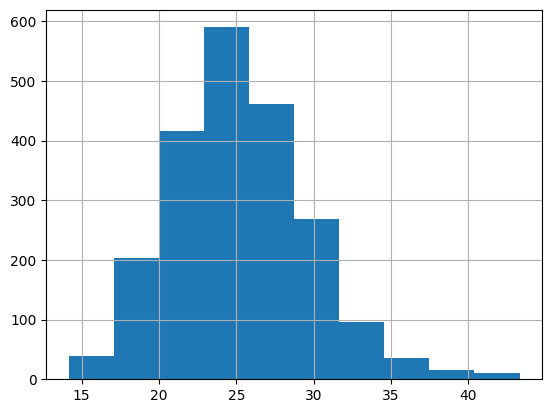

In [15]:
new_df.health_BMI.hist()

In [16]:
new_df.relative_cad.value_counts(dropna=False)

relative_cad
NO      1415
YES      655
None      67
Name: count, dtype: int64

In [17]:
new_df.relative_disease.value_counts(dropna=False)

relative_disease
None             1479
HEART DISEASE     481
DIABETES          177
Name: count, dtype: int64

In [41]:
new_df[(new_df.relative_cad.isna()) & (~new_df.relative_disease.isna())]

,person_age,person_sex,person_appearance,lifestyle_smoking,lifestyle_alcohol,health_BMI,household_income,person_education,relative_cad,relative_disease,...,household_oil,household_oil_MUSTARD,household_oil_SUNFLOWER,household_oil_SOYBEAN,diet_vegetables,diet_fish,diet_chicken,diet_meat,diet_eggs,diet_milk
1548,40,FEMALE,OBESE,NO,NO,30.278716,8000,None,None,HEART DISEASE,...,SOYBEAN,False,False,True,EVERYDAY,3 DAYS,NEVER,NEVER,1 DAY,NEVER


In [42]:
new_df['relative_cad'] = np.where(
   ((new_df['relative_cad'].isna()) & (~new_df['relative_disease'].isna())), 'YES', new_df['relative_cad']
   )

In [43]:
new_df[(new_df.relative_cad.isna()) & (~new_df.relative_disease.isna())]

,person_age,person_sex,person_appearance,lifestyle_smoking,lifestyle_alcohol,health_BMI,household_income,person_education,relative_cad,relative_disease,...,household_oil,household_oil_MUSTARD,household_oil_SUNFLOWER,household_oil_SOYBEAN,diet_vegetables,diet_fish,diet_chicken,diet_meat,diet_eggs,diet_milk


In [44]:
new_df[(new_df.relative_cad == "NO") & (~new_df.relative_disease.isna())]

,person_age,person_sex,person_appearance,lifestyle_smoking,lifestyle_alcohol,health_BMI,household_income,person_education,relative_cad,relative_disease,...,household_oil,household_oil_MUSTARD,household_oil_SUNFLOWER,household_oil_SOYBEAN,diet_vegetables,diet_fish,diet_chicken,diet_meat,diet_eggs,diet_milk
1038,62,MALE,HEALTHY,NO,NO,24.975636,5000,HIGHER SECONDARY,NO,HEART DISEASE,...,SOYBEAN;MUSTARD,True,False,True,4 DAYS,1 DAY,NEVER,1 DAY,1 DAY,NEVER
1063,58,FEMALE,THIN,NO,NO,29.766863,10000,UNDERGRADUATE,NO,HEART DISEASE,...,SOYBEAN;MUSTARD,True,False,True,EVERYDAY,EVERYDAY,NEVER,NEVER,6 DAYS,NEVER
1264,43,FEMALE,HEALTHY,NO,NO,27.492664,10000,UNDERGRADUATE,NO,HEART DISEASE,...,SUNFLOWER;MUSTARD,True,True,False,EVERYDAY,6 DAYS,1 DAY,NEVER,2 DAYS,EVERYDAY
1837,57,MALE,HEALTHY,NO,YES,28.615442,50000,UNDERGRADUATE,NO,HEART DISEASE,...,MUSTARD,True,False,False,EVERYDAY,2 DAYS,NEVER,NEVER,3 DAYS,2 DAYS


In [45]:
new_df.loc[(new_df.relative_cad == "YES") & (new_df.relative_disease.isna()),'relative_cad']='NO'

In [46]:
new_df[(new_df.relative_cad == "YES") & (new_df.relative_disease.isna())]

,person_age,person_sex,person_appearance,lifestyle_smoking,lifestyle_alcohol,health_BMI,household_income,person_education,relative_cad,relative_disease,...,household_oil,household_oil_MUSTARD,household_oil_SUNFLOWER,household_oil_SOYBEAN,diet_vegetables,diet_fish,diet_chicken,diet_meat,diet_eggs,diet_milk


In [24]:
new_df.relative_cad.value_counts(dropna=False)

relative_cad
NO      1417
YES      654
None      66
Name: count, dtype: int64

In [25]:
new_df.relative_disease.value_counts(dropna=False)

relative_disease
None             1479
HEART DISEASE     481
DIABETES          177
Name: count, dtype: int64

In [26]:
# Relative_diseease is more fundamental than relative_cad, so we would use that

In [27]:
#One-hot encoding of relative_disease

In [28]:
new_df['relative_disease'].isnull().sum()

1479

In [47]:
new_df['relative_disease'].fillna('NO', inplace=True)

<Axes: >

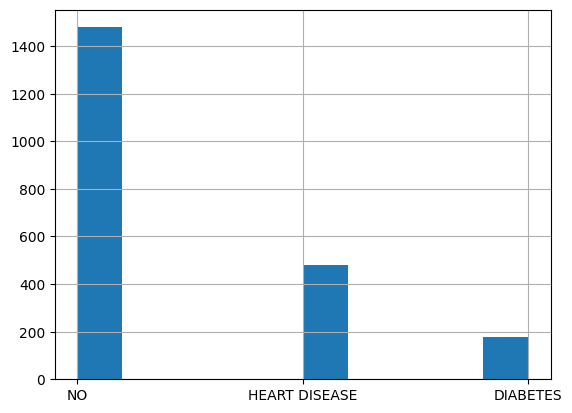

In [48]:
new_df['relative_disease'].hist(bins=10)

In [49]:
new_df['relative_relation']=df['relative_relation']
new_df['parental_disease']=np.nan
new_df.loc[new_df.relative_relation.isin(['FATHER','MOTHER']),'parental_disease'] = new_df.loc[new_df.relative_relation.isin(['FATHER','MOTHER']),'relative_disease']
new_df.parental_disease

0                 NaN
1                 NaN
2       HEART DISEASE
3                 NaN
4                 NaN
            ...      
2199              NaN
2200              NaN
2201         DIABETES
2202    HEART DISEASE
2204              NaN
Name: parental_disease, Length: 2137, dtype: object

In [50]:
new_df['parental_disease'].fillna('NO', inplace=True)

In [51]:
df_one_hot_encoded = pd.get_dummies(data = new_df, columns = ["parental_disease"], prefix = "is")

print(df_one_hot_encoded )

      person_age person_sex person_appearance lifestyle_smoking  \
0             50     FEMALE              THIN                NO   
1             43       MALE              SLIM                NO   
2             66       MALE              SLIM               YES   
3             66     FEMALE              SLIM                NO   
4             64       MALE           HEALTHY               YES   
...          ...        ...               ...               ...   
2199          57       MALE             OBESE                NO   
2200          53       MALE           HEALTHY               YES   
2201          25       MALE              SLIM               YES   
2202          41       MALE           HEALTHY               YES   
2204          45     FEMALE              SLIM                NO   

     lifestyle_alcohol  health_BMI  household_income  person_education  \
0                   NO   15.069475             15000  HIGHER SECONDARY   
1                  YES   20.307423             

In [52]:
new_df["Parental_Diabetes"]=df_one_hot_encoded["is_DIABETES"]
new_df["Parental_HEARTDISEASE"]=df_one_hot_encoded["is_HEART DISEASE"]

In [53]:
diabetes = new_df[new_df.parental_disease=='DIABETES'].health_bp_systolic
HeartD =  new_df[new_df.parental_disease== 'HEART DISEASE'].health_bp_systolic
ttest_ind(diabetes, HeartD)

TtestResult(statistic=-3.756919065904841, pvalue=0.0001922009124260612, df=502.0)

In [ ]:
#Discarding the health_BMI we would now work with person_appearance

In [ ]:
new_df.person_appearance.value_counts()

person_appearance
SLIM       846
HEALTHY    586
THIN       201
OBESE       97
Name: count, dtype: int64

In [ ]:
new_df.person_appearance.isnull().sum()

0

In [54]:
#Ordinal encoding of person_appearance
vals = pd.Categorical(new_df.person_appearance, categories=['THIN','SLIM','HEALTHY','OBESE'], ordered=True)

In [56]:
new_df = new_df.join(pd.DataFrame(vals, index=new_df.index, columns=['appearance']))

In [57]:
new_df['appearance'] = new_df.appearance.cat.codes

In [ ]:
new_df['appearance'].value_counts()

appearance
1    846
2    586
0    201
3     97
Name: count, dtype: int64

In [58]:
#Now let us investigate person_sex
male = new_df[new_df.person_sex=='MALE'].health_bp_systolic
female =  new_df[new_df.person_sex== 'FEMALE'].health_bp_systolic
from scipy.stats import ttest_ind
ttest_ind(male, female)

TtestResult(statistic=3.7087788852571193, pvalue=0.00021357567217823945, df=2135.0)

In [61]:
from scipy import stats
stats.normaltest(male)

NormaltestResult(statistic=2.9284488138177265, pvalue=0.23125728349086958)

In [62]:
stats.normaltest(female)

NormaltestResult(statistic=4.37453523548146, pvalue=0.11222296611688161)

<Axes: >

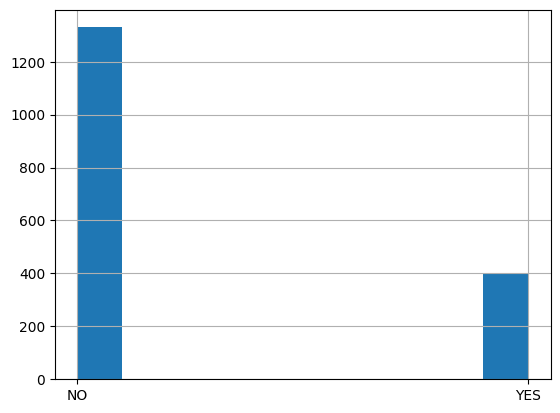

In [ ]:
new_df.lifestyle_smoking.hist()

In [ ]:
new_df.lifestyle_smoking.isnull().sum()

0

In [63]:
smoker = new_df[new_df.lifestyle_smoking == 'YES'].health_bp_systolic
nonsmoker = new_df[new_df.lifestyle_smoking =='NO'].health_bp_systolic
from scipy.stats import ttest_ind
ttest_ind(smoker, nonsmoker)

TtestResult(statistic=-0.0668865786507968, pvalue=0.9466782605122148, df=2135.0)

In [64]:
dfs= df[df.lifestyle_smoking == 'YES']
smoking_years=(-dfs.lifestyle_smoking_onset_age + dfs.lifestyle_smoking_quit_age.fillna(df.person_age)).dropna()

In [ ]:
new_df.lifestyle_alcohol.isnull().sum()

0

In [65]:
alcoholic= new_df[new_df.lifestyle_alcohol=='YES'].health_bp_systolic
non_alcoholic= new_df[new_df.lifestyle_alcohol=='NO'].health_bp_systolic
from scipy.stats import ttest_ind
ttest_ind(alcoholic, non_alcoholic)

TtestResult(statistic=0.46798152951987515, pvalue=0.6398455655845412, df=2135.0)

In [ ]:
# lifestyle_alcohol is not a significant feature for HBA1C

In [66]:
#We will use LabelEncoder to change the data type
Object=['person_sex','lifestyle_smoking','lifestyle_alcohol']

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in Object:
    new_df[i]=le.fit_transform(new_df[i])

In [67]:
new_df['household_income']=df['household_income']

In [ ]:
new_df.household_income.isnull().sum()

0

In [68]:
new_df['person_education']=df['person_education']

In [69]:
new_df.person_education.isnull().sum()

2

In [70]:
new_df['person_education'].fillna('ILLITERATE', inplace=True)

In [71]:
new_df['person_education'].value_counts()

person_education
UNDERGRADUATE       522
MIDDLE SCHOOL       485
SECONDARY           349
HIGHER SECONDARY    310
ILLITERATE          213
POST GRADUATE       137
PRIMARY SCHOOL      107
DIPLOMA              14
Name: count, dtype: int64

In [72]:
#Ordinal encoding of person_education
vals = pd.Categorical(new_df.person_education, categories=['ILLITERATE','PRIMARY SCHOOL','MIDDLE SCHOOL','SECONDARY','HIGHER SECONDARY','DIPLOMA','UNDERGRADUATE','POST GRADUATE'], ordered=True)

In [73]:
new_df = new_df.join(pd.DataFrame(vals, index=new_df.index, columns=['education']))

In [74]:
new_df['edu'] = new_df.education.cat.codes

In [75]:
new_df['household_water'].value_counts()

household_water
FILTERED     1135
TUBEWELL      569
MUNICIPAL     433
Name: count, dtype: int64

In [76]:
new_df['household_oil'].value_counts()

household_oil
MUSTARD                      1057
SUNFLOWER;MUSTARD             343
SOYBEAN;MUSTARD               334
SUNFLOWER                     172
SOYBEAN                       158
SUNFLOWER;SOYBEAN;MUSTARD      49
SUNFLOWER;SOYBEAN              18
OTHER                           4
SUNFLOWER;DALDA                 2
Name: count, dtype: int64

In [77]:
new_df['diet_vegetables'].value_counts()

diet_vegetables
EVERYDAY    1996
2 DAYS        44
3 DAYS        25
5 DAYS        23
NEVER         14
4 DAYS        14
6 DAYS        13
1 DAY          8
Name: count, dtype: int64

In [78]:
dict = {"NEVER": 0, "1 DAY" : 1/7, "2 DAYS" :2/7, "3 DAYS": 3/7, "4 DAYS" : 4/7, "5 DAYS": 5/7, "6 DAYS": 6/7, "EVERYDAY":1 }
new_df=new_df.replace({"diet_vegetables": dict})
new_df

,person_age,person_sex,person_appearance,lifestyle_smoking,lifestyle_alcohol,health_BMI,household_income,person_education,relative_cad,relative_disease,...,diet_chicken,diet_meat,diet_eggs,diet_milk,parental_disease,Parental_Diabetes,Parental_HEARTDISEASE,appearance,education,edu
0,50,0,THIN,0,0,15.069475,15000,HIGHER SECONDARY,NO,NO,...,1 DAY,NEVER,4 DAYS,EVERYDAY,NO,False,False,0,HIGHER SECONDARY,4
1,43,1,SLIM,0,1,20.307423,7000,PRIMARY SCHOOL,NO,NO,...,1 DAY,NEVER,2 DAYS,NEVER,NO,False,False,1,PRIMARY SCHOOL,1
2,66,1,SLIM,1,0,19.926578,30000,SECONDARY,YES,HEART DISEASE,...,1 DAY,NEVER,1 DAY,NEVER,HEART DISEASE,False,True,1,SECONDARY,3
3,66,0,SLIM,0,0,16.603882,25000,SECONDARY,NO,NO,...,1 DAY,NEVER,1 DAY,EVERYDAY,NO,False,False,1,SECONDARY,3
4,64,1,HEALTHY,1,1,26.687381,30000,SECONDARY,YES,HEART DISEASE,...,NEVER,1 DAY,NEVER,EVERYDAY,NO,False,False,2,SECONDARY,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2199,57,1,OBESE,0,0,30.651917,30000,HIGHER SECONDARY,YES,HEART DISEASE,...,1 DAY,NEVER,NEVER,NEVER,NO,False,False,3,HIGHER SECONDARY,4
2200,53,1,HEALTHY,1,1,28.153118,10000,MIDDLE SCHOOL,YES,DIABETES,...,NEVER,NEVER,NEVER,NEVER,NO,False,False,2,MIDDLE SCHOOL,2
2201,25,1,SLIM,1,1,21.349905,5000,MIDDLE SCHOOL,YES,DIABETES,...,1 DAY,NEVER,3 DAYS,2 DAYS,DIABETES,True,False,1,MIDDLE SCHOOL,2
2202,41,1,HEALTHY,1,1,27.399045,70000,MIDDLE SCHOOL,YES,HEART DISEASE,...,1 DAY,NEVER,1 DAY,NEVER,HEART DISEASE,False,True,2,MIDDLE SCHOOL,2


In [79]:
new_df['diet_vegetables'].value_counts()

diet_vegetables
1.000000    1996
0.285714      44
0.428571      25
0.714286      23
0.000000      14
0.571429      14
0.857143      13
0.142857       8
Name: count, dtype: int64

In [80]:
new_df['diet_chicken'].value_counts()

diet_chicken
1 DAY       944
NEVER       924
2 DAYS      195
3 DAYS       48
5 DAYS        9
4 DAYS        9
EVERYDAY      5
6 DAYS        3
Name: count, dtype: int64

In [81]:
new_df['diet_fish'].value_counts()

diet_fish
2 DAYS      509
3 DAYS      409
4 DAYS      285
NEVER       262
5 DAYS      222
1 DAY       196
EVERYDAY    132
6 DAYS      122
Name: count, dtype: int64

In [82]:
new_df=new_df.replace({"diet_chicken": dict})
new_df

,person_age,person_sex,person_appearance,lifestyle_smoking,lifestyle_alcohol,health_BMI,household_income,person_education,relative_cad,relative_disease,...,diet_chicken,diet_meat,diet_eggs,diet_milk,parental_disease,Parental_Diabetes,Parental_HEARTDISEASE,appearance,education,edu
0,50,0,THIN,0,0,15.069475,15000,HIGHER SECONDARY,NO,NO,...,0.142857,NEVER,4 DAYS,EVERYDAY,NO,False,False,0,HIGHER SECONDARY,4
1,43,1,SLIM,0,1,20.307423,7000,PRIMARY SCHOOL,NO,NO,...,0.142857,NEVER,2 DAYS,NEVER,NO,False,False,1,PRIMARY SCHOOL,1
2,66,1,SLIM,1,0,19.926578,30000,SECONDARY,YES,HEART DISEASE,...,0.142857,NEVER,1 DAY,NEVER,HEART DISEASE,False,True,1,SECONDARY,3
3,66,0,SLIM,0,0,16.603882,25000,SECONDARY,NO,NO,...,0.142857,NEVER,1 DAY,EVERYDAY,NO,False,False,1,SECONDARY,3
4,64,1,HEALTHY,1,1,26.687381,30000,SECONDARY,YES,HEART DISEASE,...,0.000000,1 DAY,NEVER,EVERYDAY,NO,False,False,2,SECONDARY,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2199,57,1,OBESE,0,0,30.651917,30000,HIGHER SECONDARY,YES,HEART DISEASE,...,0.142857,NEVER,NEVER,NEVER,NO,False,False,3,HIGHER SECONDARY,4
2200,53,1,HEALTHY,1,1,28.153118,10000,MIDDLE SCHOOL,YES,DIABETES,...,0.000000,NEVER,NEVER,NEVER,NO,False,False,2,MIDDLE SCHOOL,2
2201,25,1,SLIM,1,1,21.349905,5000,MIDDLE SCHOOL,YES,DIABETES,...,0.142857,NEVER,3 DAYS,2 DAYS,DIABETES,True,False,1,MIDDLE SCHOOL,2
2202,41,1,HEALTHY,1,1,27.399045,70000,MIDDLE SCHOOL,YES,HEART DISEASE,...,0.142857,NEVER,1 DAY,NEVER,HEART DISEASE,False,True,2,MIDDLE SCHOOL,2


In [83]:
new_df=new_df.replace({"diet_fish": dict})
new_df

,person_age,person_sex,person_appearance,lifestyle_smoking,lifestyle_alcohol,health_BMI,household_income,person_education,relative_cad,relative_disease,...,diet_chicken,diet_meat,diet_eggs,diet_milk,parental_disease,Parental_Diabetes,Parental_HEARTDISEASE,appearance,education,edu
0,50,0,THIN,0,0,15.069475,15000,HIGHER SECONDARY,NO,NO,...,0.142857,NEVER,4 DAYS,EVERYDAY,NO,False,False,0,HIGHER SECONDARY,4
1,43,1,SLIM,0,1,20.307423,7000,PRIMARY SCHOOL,NO,NO,...,0.142857,NEVER,2 DAYS,NEVER,NO,False,False,1,PRIMARY SCHOOL,1
2,66,1,SLIM,1,0,19.926578,30000,SECONDARY,YES,HEART DISEASE,...,0.142857,NEVER,1 DAY,NEVER,HEART DISEASE,False,True,1,SECONDARY,3
3,66,0,SLIM,0,0,16.603882,25000,SECONDARY,NO,NO,...,0.142857,NEVER,1 DAY,EVERYDAY,NO,False,False,1,SECONDARY,3
4,64,1,HEALTHY,1,1,26.687381,30000,SECONDARY,YES,HEART DISEASE,...,0.000000,1 DAY,NEVER,EVERYDAY,NO,False,False,2,SECONDARY,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2199,57,1,OBESE,0,0,30.651917,30000,HIGHER SECONDARY,YES,HEART DISEASE,...,0.142857,NEVER,NEVER,NEVER,NO,False,False,3,HIGHER SECONDARY,4
2200,53,1,HEALTHY,1,1,28.153118,10000,MIDDLE SCHOOL,YES,DIABETES,...,0.000000,NEVER,NEVER,NEVER,NO,False,False,2,MIDDLE SCHOOL,2
2201,25,1,SLIM,1,1,21.349905,5000,MIDDLE SCHOOL,YES,DIABETES,...,0.142857,NEVER,3 DAYS,2 DAYS,DIABETES,True,False,1,MIDDLE SCHOOL,2
2202,41,1,HEALTHY,1,1,27.399045,70000,MIDDLE SCHOOL,YES,HEART DISEASE,...,0.142857,NEVER,1 DAY,NEVER,HEART DISEASE,False,True,2,MIDDLE SCHOOL,2


In [84]:
new_df['diet_fish'].value_counts()

diet_fish
0.285714    509
0.428571    409
0.571429    285
0.000000    262
0.714286    222
0.142857    196
1.000000    132
0.857143    122
Name: count, dtype: int64

In [85]:
new_df=new_df.replace({"diet_meat": dict})
new_df=new_df.replace({"diet_eggs": dict})
new_df=new_df.replace({"diet_milk": dict})
new_df

,person_age,person_sex,person_appearance,lifestyle_smoking,lifestyle_alcohol,health_BMI,household_income,person_education,relative_cad,relative_disease,...,diet_chicken,diet_meat,diet_eggs,diet_milk,parental_disease,Parental_Diabetes,Parental_HEARTDISEASE,appearance,education,edu
0,50,0,THIN,0,0,15.069475,15000,HIGHER SECONDARY,NO,NO,...,0.142857,0.000000,0.571429,1.000000,NO,False,False,0,HIGHER SECONDARY,4
1,43,1,SLIM,0,1,20.307423,7000,PRIMARY SCHOOL,NO,NO,...,0.142857,0.000000,0.285714,0.000000,NO,False,False,1,PRIMARY SCHOOL,1
2,66,1,SLIM,1,0,19.926578,30000,SECONDARY,YES,HEART DISEASE,...,0.142857,0.000000,0.142857,0.000000,HEART DISEASE,False,True,1,SECONDARY,3
3,66,0,SLIM,0,0,16.603882,25000,SECONDARY,NO,NO,...,0.142857,0.000000,0.142857,1.000000,NO,False,False,1,SECONDARY,3
4,64,1,HEALTHY,1,1,26.687381,30000,SECONDARY,YES,HEART DISEASE,...,0.000000,0.142857,0.000000,1.000000,NO,False,False,2,SECONDARY,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2199,57,1,OBESE,0,0,30.651917,30000,HIGHER SECONDARY,YES,HEART DISEASE,...,0.142857,0.000000,0.000000,0.000000,NO,False,False,3,HIGHER SECONDARY,4
2200,53,1,HEALTHY,1,1,28.153118,10000,MIDDLE SCHOOL,YES,DIABETES,...,0.000000,0.000000,0.000000,0.000000,NO,False,False,2,MIDDLE SCHOOL,2
2201,25,1,SLIM,1,1,21.349905,5000,MIDDLE SCHOOL,YES,DIABETES,...,0.142857,0.000000,0.428571,0.285714,DIABETES,True,False,1,MIDDLE SCHOOL,2
2202,41,1,HEALTHY,1,1,27.399045,70000,MIDDLE SCHOOL,YES,HEART DISEASE,...,0.142857,0.000000,0.142857,0.000000,HEART DISEASE,False,True,2,MIDDLE SCHOOL,2


In [86]:
new_df=new_df.replace({True:1, False:0})
new_df

,person_age,person_sex,person_appearance,lifestyle_smoking,lifestyle_alcohol,health_BMI,household_income,person_education,relative_cad,relative_disease,...,diet_chicken,diet_meat,diet_eggs,diet_milk,parental_disease,Parental_Diabetes,Parental_HEARTDISEASE,appearance,education,edu
0,50,0,THIN,0,0,15.069475,15000,HIGHER SECONDARY,NO,NO,...,0.142857,0.000000,0.571429,1.000000,NO,0,0,0,HIGHER SECONDARY,4
1,43,1,SLIM,0,1,20.307423,7000,PRIMARY SCHOOL,NO,NO,...,0.142857,0.000000,0.285714,0.000000,NO,0,0,1,PRIMARY SCHOOL,1
2,66,1,SLIM,1,0,19.926578,30000,SECONDARY,YES,HEART DISEASE,...,0.142857,0.000000,0.142857,0.000000,HEART DISEASE,0,1,1,SECONDARY,3
3,66,0,SLIM,0,0,16.603882,25000,SECONDARY,NO,NO,...,0.142857,0.000000,0.142857,1.000000,NO,0,0,1,SECONDARY,3
4,64,1,HEALTHY,1,1,26.687381,30000,SECONDARY,YES,HEART DISEASE,...,0.000000,0.142857,0.000000,1.000000,NO,0,0,2,SECONDARY,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2199,57,1,OBESE,0,0,30.651917,30000,HIGHER SECONDARY,YES,HEART DISEASE,...,0.142857,0.000000,0.000000,0.000000,NO,0,0,3,HIGHER SECONDARY,4
2200,53,1,HEALTHY,1,1,28.153118,10000,MIDDLE SCHOOL,YES,DIABETES,...,0.000000,0.000000,0.000000,0.000000,NO,0,0,2,MIDDLE SCHOOL,2
2201,25,1,SLIM,1,1,21.349905,5000,MIDDLE SCHOOL,YES,DIABETES,...,0.142857,0.000000,0.428571,0.285714,DIABETES,1,0,1,MIDDLE SCHOOL,2
2202,41,1,HEALTHY,1,1,27.399045,70000,MIDDLE SCHOOL,YES,HEART DISEASE,...,0.142857,0.000000,0.142857,0.000000,HEART DISEASE,0,1,2,MIDDLE SCHOOL,2


In [87]:
# Zscore normalizations

new_df.health_BMI = (new_df.health_BMI - new_df.health_BMI.mean())/(new_df.health_BMI.std())
new_df.person_age = (new_df.person_age - new_df.person_age.mean())/(new_df.person_age.std())
new_df.household_income = (new_df.household_income - new_df.household_income.mean())/(new_df.household_income.std())
new_df.household_oil_MUSTARD = (new_df.household_oil_MUSTARD-new_df.household_oil_MUSTARD.mean())/(new_df.household_oil_MUSTARD.std())
new_df.household_oil_SOYBEAN = (new_df.household_oil_SOYBEAN- new_df.household_oil_SOYBEAN.mean())/(new_df.household_oil_SOYBEAN.std())
new_df.household_oil_SUNFLOWER = (new_df.household_oil_SUNFLOWER - new_df.household_oil_SUNFLOWER.mean())/(new_df.household_oil_SUNFLOWER.std())
new_df.health_bp_systolic = (new_df.health_bp_systolic -new_df.health_bp_systolic.mean())/(new_df.health_bp_systolic.std())

In [88]:
files=new_df.to_csv('CSI_model_ready_systolic.csv', index=True)